In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr, pearsonr

In [29]:
pd.set_option('max_colwidth', -1)

In [85]:
df_bws = pd.read_csv("results_4tuple_multiple.csv")

In [86]:
df_bws.head()

,Unnamed: 0,sentence,sent_idx,scores,scores_sum,scores_avg,scores_std,scores_avg_rank
0,0,Chris is so ______ that he refuses to share anything with his sister .,0,"[1, 0, 1, 1, 0, 0, -1, 0, 1, -1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, -1, 0, 1]",8,0.333333,0.687184,1365.5
1,1,"The neighbors complained about noise, no matter how ______ we were .",1,"[1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]",17,0.708333,0.454530,1738.0
2,2,I wonder what people think about when they are ______ .,2,"[-1, -1, -1, 0, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, 0, 0, -1, -1, -1, 0]",-17,-0.680000,0.545527,108.5
3,3,"Tracy was very shy and was usually ______ , rather than talkative .",3,"[1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, -1, 1, 1]",13,0.541667,0.575845,1627.5
4,4,We were surprised to find out that it was ______ .,4,"[0, 0, 0, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1]",-18,-0.782609,0.412471,60.5


In [87]:
df_bws.shape

(1783, 8)

In [88]:
df_bws.loc[22, 'sentence'] = " The artwork was smooth except for six huge ______ . "
df_bws.loc[578, 'sentence'] = " The mother could not believe her son was capable of something so ______ . "
df_bws.loc[892, 'sentence'] = " He might not have been so ashamed if his actions were not so ______ . "

In [89]:
df_est = pd.read_pickle("cloze_df_raw3.pickle")
df_est['sentence'] = df_est['sentence'].apply(lambda sent:sent.strip('<BEOS>').replace('[]','______'))

In [90]:
df_est.tail()

,index,cloze_resp,sentID_GM,sentence,targ,targ_POS,cloze_resp_len,ent_elmo,ent_cloze,bert_score,glove_score
1778,2002,"{'stare': 3, 'shrug': 1, 'look': 2, 'relax': 1, 'cry': 1, 'watch': 11, 'gawk': 1, 'think': 2, 'sulk': 1, 'sleep': 1, 'act': 1, 'complain': 1, 'talk': 1, 'wait': 3}",{1110},"You should take action, not just stand there and ______ .",{pontificate},VB,[30],2.200516,2.209827,0.682547,0.402284
1779,2003,"{'wander': 1, 'differ': 1, 'stray': 10, 'diverge': 1, 'unhook': 1, 'obvious': 1, 'location': 1, 'deter': 1, 'deviate': 13}",{1498},You will get lost if you ______ from the map's directions .,{deviate},VB,[30],2.164536,1.522191,0.812142,0.417475
1780,2004,"{'wander': 5, 'diverge': 1, 'stray': 3, 'stop': 1, 'cross': 1, 'deter': 1, 'turn': 11, 'waver': 2, 'fail': 1, 'yell': 1, 'meander': 1, 'deviate': 2}",{1490},You will not get lost if you stay straight and do not ______ .,{deviate},VB,[30],2.205598,2.051449,0.692133,0.312249
1781,2005,"{'available': 2, 'noticeable': 1, 'evident': 1, 'needed': 1, 'clear': 4, 'apparent': 4, 'plentiful': 1, 'visible': 1, 'important': 3, 'obvious': 9, 'common': 1, 'popular': 1, 'subtle': 1}",{150},You'll find what you're looking for when it becomes more ______ .,{frigid},AJ,[30],2.151322,2.216280,0.710006,0.463522
1782,2006,"{'none': 4, 'work': 1, 'play': 1, 'adhere': 3, 'continue': 1, 'stick': 16, 'follow': 1, 'hold': 1, 'keep': 2}",{1215},"Your plan's nice, but I doubt I could ______ to it for long .",{adhere},VB,[30],1.965131,1.581573,0.794104,0.523470


In [91]:
df_est.shape

(1783, 11)

In [92]:
df_all = df_est.merge(df_bws, on='sentence', how='outer')

In [115]:
df_all.sort_values('scores_avg', ascending=False).head()

,index,cloze_resp,sentID_GM,sentence,targ,targ_POS,cloze_resp_len,ent_elmo,ent_cloze,bert_score,glove_score,Unnamed: 0,sent_idx,scores,scores_sum,scores_avg,scores_std,scores_avg_rank
1451,1619,"{'series': 4, 'number': 3, 'possibility': 1, 'rumbling': 1, 'sudden': 1, 'shake': 1, 'likelihood': 1, 'slew': 1, 'destruction': 1, 'consequences': 1, 'fit': 1, 'tremors': 1, 'shock': 2, 'litany': 1, 'onset': 1, 'start': 1, 'amount': 1, 'barrage': 1, 'mass': 1, 'massive': 1, 'threat': 1, 'shaking': 1, 'round': 2}",{1005},"The volcano was inactive, so we were unprepared for the ______ of earthquakes .",{resurgence},NN,[30],2.070132,3.014077,0.709064,0.203894,20,20,"[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]",22,0.916667,0.276385,1783.0
1226,1368,"{'destroyed': 16, 'damaged': 2, 'incinerated': 1, 'engulfed': 1, 'consumed': 1, 'burnt': 1, 'burned': 8}",{969},The fire was so out of control that it thoroughly ______ several homes .,{decimate},VB,[30],1.809769,1.321756,0.944040,0.721414,1345,1345,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]",21,0.875000,0.330719,1781.5
1421,1587,"{'birthright': 1, 'goal': 24, 'intention': 1, 'meet': 1, 'dream': 1, 'focus': 1, 'goalie': 1}",{898},The swim team held extra practices before championships because winning was their ______ .,{incentive},NN,[30],2.220025,0.858754,0.883297,0.729629,302,302,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",21,0.875000,0.330719,1781.5
1389,1553,"{'chastised': 1, 'admonished': 2, 'detained': 1, 'punish': 1, 'disciplined': 3, 'reprimanded': 7, 'accused': 1, 'punished': 3, 'questioned': 1, 'lectured': 3, 'scolded': 7}",{2071},The school bully looked pitiful while he was being ______ by the principal .,{chasten},VB,[30],2.248386,2.117312,0.792629,0.448407,1057,1057,"[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]",20,0.833333,0.372678,1776.0
799,901,"{'beneficial': 1, 'good': 2, 'useful': 2, 'possible': 1, 'valuable': 3, 'constructive': 1, 'important': 2, 'prudent': 1, 'profitable': 1, 'none': 1, 'productive': 4, 'effective': 3, 'efficient': 3, 'interesting': 1, 'delightful': 1, 'potential': 1, 'truth': 1, 'positive': 1}",{1787},"My disappointed parents do not believe that I am finding the most ______ use of my time,.",{lucrative},AJ,[30],1.975765,2.748145,0.685038,0.371130,13,13,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]",20,0.833333,0.372678,1776.0


In [116]:
df_all.sort_values('scores_avg', ascending=True).head()

,index,cloze_resp,sentID_GM,sentence,targ,targ_POS,cloze_resp_len,ent_elmo,ent_cloze,bert_score,glove_score,Unnamed: 0,sent_idx,scores,scores_sum,scores_avg,scores_std,scores_avg_rank
1250,1394,"{'available': 1, 'real': 1, 'crazy': 1, 'right': 2, 'love': 1, 'fate': 1, 'normal': 1, 'big': 1, 'coming': 1, 'possible': 3, 'appropriate': 2, 'lunchtime': 1, 'allowed': 1, 'okay': 1, 'true': 6, 'necessary': 1, 'destiny': 1, 'there': 1, 'arrested': 1, 'feasible': 1, 'pretty': 1}",{1355},The girl wondered whether or not it was ______ .,{benign},AJ,[30],2.224098,2.840565,0.507345,0.308608,537,537,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]",-24,-1.000000,0.000000,1.0
472,524,"{'poop': 1, 'missing': 6, 'dead': 1, 'wrong': 4, 'buried': 1, 'distorted': 1, 'funny': 2, 'damaged': 1, 'stolen': 3, 'off': 3, 'interesting': 1, 'informative': 1, 'stupid': 1, 'green': 1, 'demolished': 1, 'hidden': 1, 'difficult': 1}",{1291},I saw a show in which something was ______ .,{augur},VB,[30],2.263530,2.592074,0.591874,0.266683,1465,1465,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1]",-23,-0.958333,0.199826,4.0
1495,1668,"{'injured': 2, 'crazy': 3, 'good': 1, 'suicidal': 1, 'around': 1, 'missing': 2, 'alive': 2, 'sad': 1, 'sober': 1, 'hurt': 1, 'lesbian': 1, 'abused': 1, 'afraid': 1, 'lost': 1, 'dying': 1, 'angry': 1, 'raped': 1, 'mislead': 1, 'kidnapped': 1, 'sick': 2, 'alright': 1, 'abducted': 1, 'correct': 1, 'lying': 1}",{1068},There were no signs that the girl was ______ .,{equivocate},VB,[30],2.208855,3.106497,0.532179,0.217486,1536,1536,"[-1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]",-23,-0.958333,0.199826,4.0
1601,1790,"{'controversial': 1, 'big': 1, 'hard': 11, 'strange': 1, 'volatile': 1, 'easy': 2, 'interesting': 1, 'difficult': 11, 'cool': 1}",{1773},We did not realize the this would be so ______ .,{lucrative},AJ,[30],2.262386,1.596531,0.778873,0.608156,171,171,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]",-23,-0.958333,0.199826,4.0
1012,1133,"{'lazy': 1, 'likable': 1, 'prick': 1, 'rude': 1, 'smarter': 1, 'juicy': 1, 'cheaper': 1, 'good': 1, 'special': 1, 'faster': 1, 'rugged': 1, 'helpful': 2, 'giving': 1, 'soft': 1, 'reliable': 1, 'worried': 1, 'bad': 1, 'expensive': 1, 'fun': 1, 'mean': 1, 'intelligent': 2, 'friendly': 3, 'smart': 2, 'difficult': 2}",{1712},Some of them are more ______ than others .,{heinous},AJ,[30],2.243619,3.106497,0.571033,0.236310,119,119,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1]",-23,-0.958333,0.199826,4.0


In [94]:
df_all.to_csv("cloze_df_scores_all.csv")
df_all.to_pickle("cloze_df_scores_all.pickle")

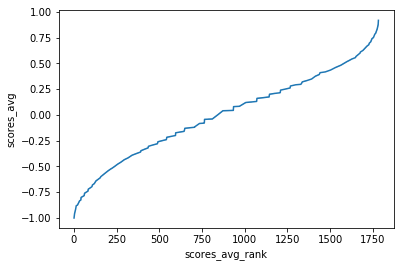

In [97]:
sns.lineplot(data=df_all, x='scores_avg_rank', y='scores_avg')

# Correlation results 

## bws vs lexical entropy 

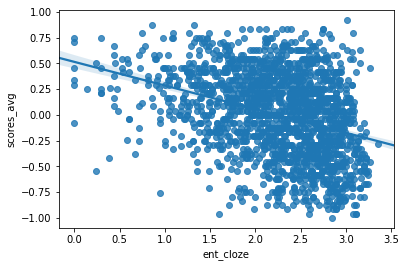

In [98]:
sns.regplot(data=df_all, x='ent_cloze', y='scores_avg')

In [99]:
spearmanr(df_all['ent_cloze'], df_all['scores_avg'])

SpearmanrResult(correlation=-0.34358578600697137, pvalue=1.4323147872384678e-50)

In [100]:
pearsonr(df_all['ent_cloze'], df_all['scores_avg'])

(-0.3391923151727338, 2.9837068954123058e-49)

## bws vs semantic density-glove

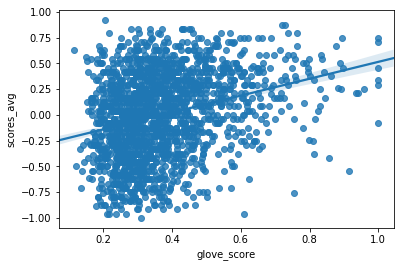

In [101]:
sns.regplot(data=df_all, x='glove_score', y='scores_avg')

In [102]:
spearmanr(df_all['glove_score'], df_all['scores_avg'])

SpearmanrResult(correlation=0.2912768990569902, pvalue=3.325171094190923e-36)

In [103]:
pearsonr(df_all['glove_score'], df_all['scores_avg'])

(0.29021809665594034, 6.07397827209082e-36)

## bws vs semantic density-elmo

In [104]:
# TODO: rework on elmo score

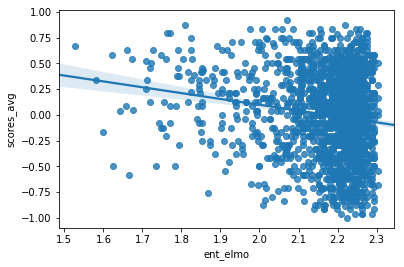

In [105]:
sns.regplot(data=df_all, x='ent_elmo', y='scores_avg')

In [107]:
spearmanr(df_all['ent_elmo'], df_all['scores_avg'])

SpearmanrResult(correlation=-0.13729810618834642, pvalue=5.849188659719266e-09)

In [108]:
pearsonr(df_all['ent_elmo'], df_all['scores_avg'])

(-0.15800918626697394, 1.9523697923490407e-11)

## bws vs semantic density-bert

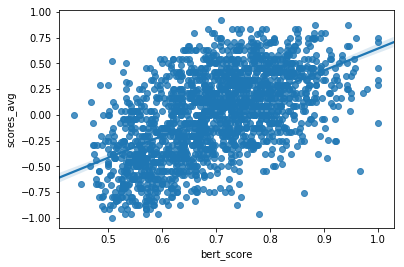

In [109]:
sns.regplot(data=df_all, x='bert_score', y='scores_avg')

In [110]:
spearmanr(df_all['bert_score'], df_all['scores_avg'])

SpearmanrResult(correlation=0.5682665487263515, pvalue=5.040442374712088e-153)

In [111]:
pearsonr(df_all['bert_score'], df_all['scores_avg'])

(0.5650984337090679, 5.6287395827412786e-151)

## bws-rank vs semantic density-bert

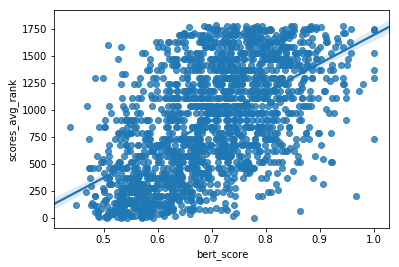

In [112]:
sns.regplot(data=df_all, x='bert_score', y='scores_avg_rank')

In [113]:
spearmanr(df_all['bert_score'], df_all['scores_avg_rank'])

SpearmanrResult(correlation=0.5682665487263515, pvalue=5.040442374712088e-153)

In [114]:
pearsonr(df_all['bert_score'], df_all['scores_avg_rank'])

(0.5604376334635037, 5.2866505345403876e-148)